In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings('ignore')

import re
import jax.numpy as jnp
from jax import grad, jit, partial, jacrev
import ticktack
from ticktack import fitting_tinygp as fitting
from tqdm import tqdm
import scipy

rcParams['figure.figsize'] = (8.0, 4.0)

In [2]:
cbm = ticktack.load_presaved_model('Guttler14', production_rate_units = 'atoms/cm^2/s')
cf = fitting.CarbonFitter(cbm)
cf.load_data('inject_recovery_gp.csv')
cf.prepare_function(use_control_points=True, interp='gp')

In [3]:
cf.d14c_data

DeviceArray([-0.44411908, -0.44428419, -0.44444606, -0.44460284,
             -0.44475166, -0.4448882 , -0.44500593, -0.44509518,
             -0.44514175, -0.44512501, -0.44501535, -0.44477078,
             -0.44433238, -0.44361855, -0.4425175 , -0.44087799,
             -0.4384979 , -0.43511037, -0.43036756, -0.42382177,
             -0.41490434, -0.40290254, -0.38693522, -0.36592835,
             -0.33859176, -0.303399  , -0.25857254, -0.20207672,
             -0.13162135, -0.04467859,  0.06148415,  0.18975331,
              0.34309861,  0.5244825 ,  0.73675036,  0.98250381,
              1.263961  ,  1.58280947,  1.94005851,  2.33589948,
              2.76958284,  3.23932129,  3.74222775,  4.27429558,
              4.83042682,  5.4045114 ,  5.98955761,  6.57787038,
              7.16127116,  7.73134977,  8.27973636,  8.79837975,
              9.27981773,  9.71742506, 10.10562619, 10.44006178,
             10.71770138, 10.93689752, 11.09738063, 11.20019749,
             11.2475993 ,

In [4]:
np.random.randn(25)*2.5

array([ 1.21540542, -4.76065645,  5.10609691, -0.89345664,  4.18744199,
       -0.17569578, -1.21009505,  3.20070432, -0.78512978,  5.4530105 ,
        0.83497237, -0.01551874, -2.66168192,  0.40246195, -0.4365395 ,
        2.69409339,  3.28927289, -2.45280418,  3.64250111,  1.28522467,
        0.78037081, -1.10211027,  3.98747582,  3.37736339,  1.20500764])

In [5]:
np.random.seed(0)
arr = np.array(cf.d14c_data) + np.random.randn(cf.d14c_data.size)*2.5

In [6]:
import pandas as pd
df = pd.DataFrame(arr)
df.to_csv("data.csv")

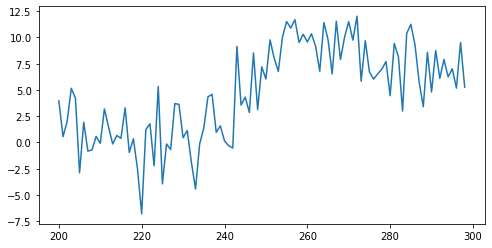

In [7]:
plt.plot(cf.time_data, arr)